In [ ]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

subject = 2  
runs = 10 

fnames = eegbci.load_data(subject, runs)
raw_list = [read_raw_edf(f, preload=True) for f in fnames]
raw = concatenate_raws(raw_list)


Extracting EDF parameters from /Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [20]:
mne.datasets.eegbci.standardize(raw)


In [21]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)


<RawEDF | S002R10.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

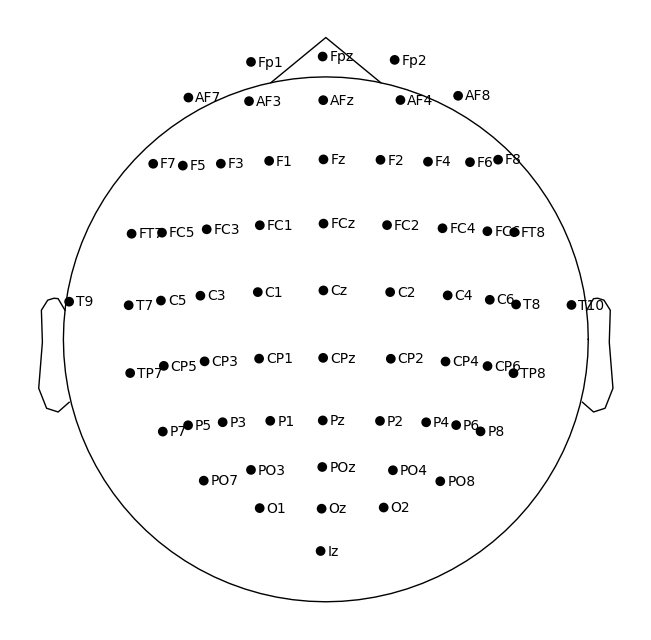

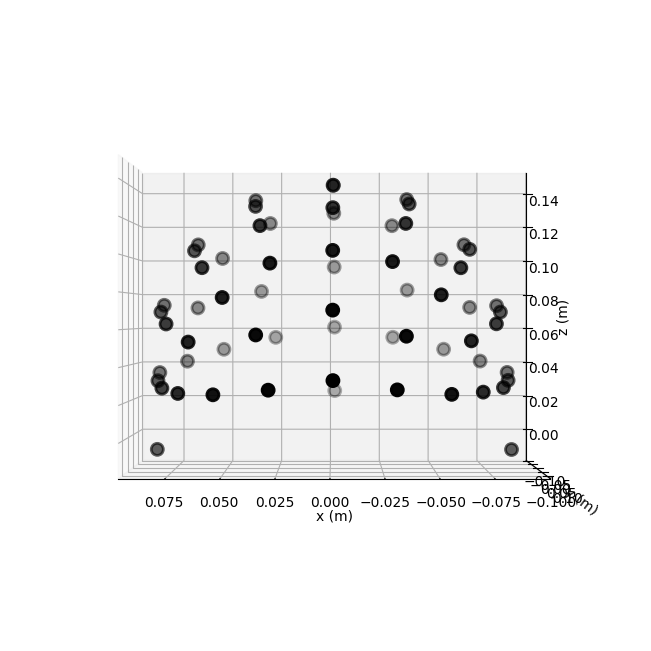

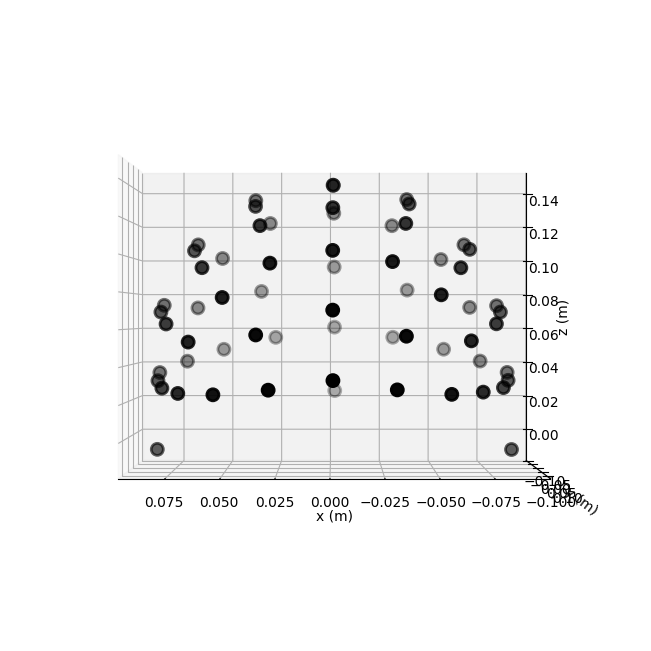

In [22]:
raw.plot_sensors(show_names=True)    # 2D scalp
raw.plot_sensors(kind='3d')          # 3D head


In [23]:
raw.filter(8., 30., fir_design='firwin')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



<RawEDF | S002R10.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

In [26]:
# Extract events from the annotations
events, event_id = mne.events_from_annotations(raw)
print(event_id)


Used Annotations descriptions: [np.str_('feet'), np.str_('hands'), np.str_('rest')]
{np.str_('feet'): 1, np.str_('hands'): 2, np.str_('rest'): 3}


In [24]:
raw.annotations.rename({
    "T1": "hands",
    "T2": "feet",
    "T0": "rest"
})

<Annotations | 30 segments: feet (7), hands (8), rest (15)>

In [29]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('feet'), np.str_('hands'), np.str_('rest')]
{np.str_('feet'): 1, np.str_('hands'): 2, np.str_('rest'): 3}


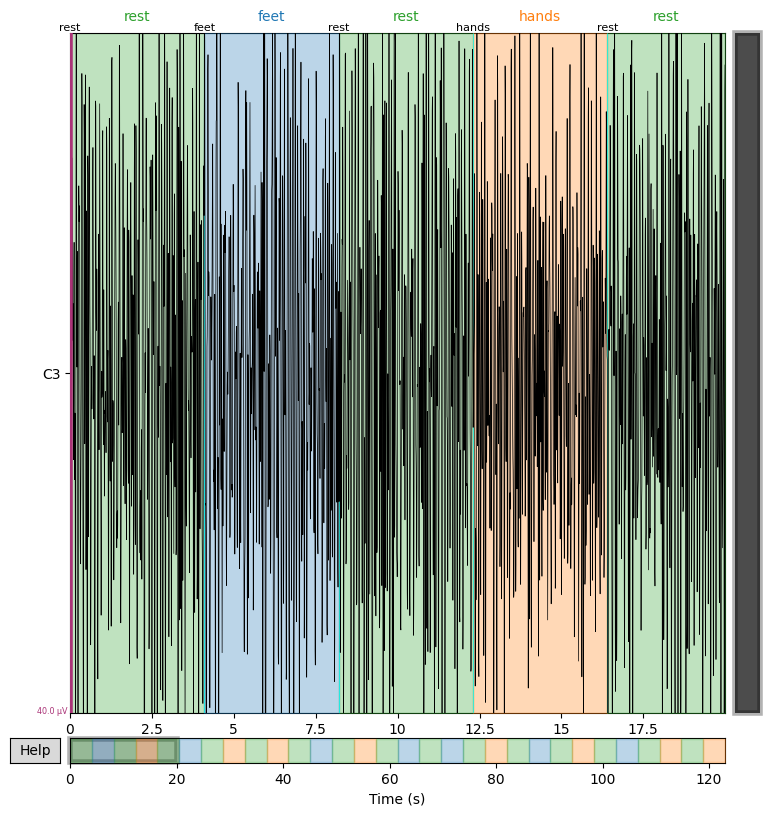

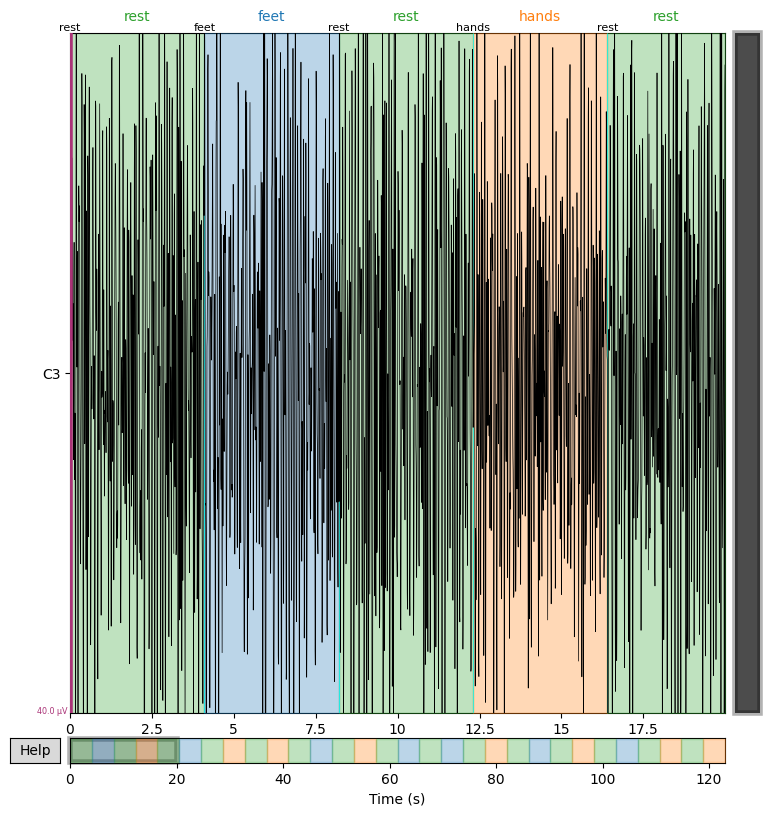

In [30]:
raw.pick(['C3'])

# Plot EEG with event markers
raw.plot(events=events, event_id=event_id, start=0, duration=20)